In [1]:
%load_ext autoreload
%autoreload 2
from mesh_import import mesh

E:\LangOn\OntoDeepLex\src\mesh\cns.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import igraph as ig
from CwnGraph import CwnBase, CwnSense, CwnFacet, PwnSynset
from tqdm.autonotebook import tqdm

In [3]:
cns_dir = mesh.get_data_dir() / "cns"

In [4]:
cwn = CwnBase()

## import data into igraph

In [5]:
from matplotlib import pyplot as plt

In [6]:
def summarize_graph(G, compo_distr):    
    print("--------")
    print(G.summary())
    print("|Max component|: %d" % compo_distr[-1][0])
    print("|Max component|/|V|: %.2f" % (compo_distr[-1][0]/len(G.vs)))

## Graph A

In [7]:
rel_set_a = ["hypernym"]
G_a = mesh.build_igraph(cwn, included_rel=rel_set_a)

In [8]:
G_a.summary()

'IGRAPH UN-- 28827 3122 -- \n+ attr: name (v), rel_type (e)'

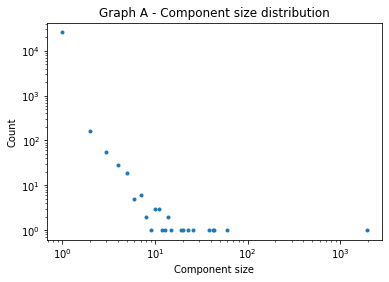

In [9]:
# compo_sizes: Dict[CompoSize, Count]
compo_distr_a = mesh.compo_size_distribution(G_a, title_label="Graph A")

In [10]:
print("Graph A")
summarize_graph(G_a, compo_distr_a)

Graph A
--------
IGRAPH UN-- 28827 3122 -- 
+ attr: name (v), rel_type (e)
|Max component|: 1931
|Max component|/|V|: 0.07


In [11]:
G_a.write(cns_dir / "cwn_sense_graph_a.pkl", format="pickle")

## Graph B

In [7]:
rel_set_b = ["synonym"]
G_b = mesh.build_igraph(cwn, included_rel=rel_set_b)

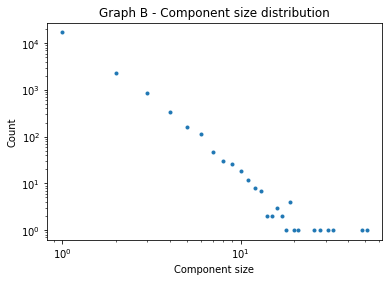

In [8]:
# compo_sizes: Dict[CompoSize, Count]
compo_distr_b = mesh.compo_size_distribution(G_b, title_label="Graph B")

In [9]:
print("Graph B")
summarize_graph(G_b, compo_distr_b)

Graph B
--------
IGRAPH UN-- 28827 14875 -- 
+ attr: name (v), rel_type (e)
|Max component|: 51
|Max component|/|V|: 0.00


In [10]:
G_b.write(cns_dir / "cwn_sense_graph_b.pkl", format="pickle")

## Graph C

In [16]:
rel_set_c = None
G_c = mesh.build_igraph(cwn, included_rel=rel_set_c)

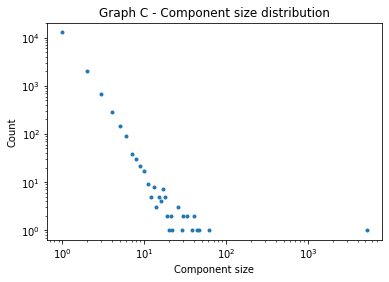

In [17]:
# compo_sizes: Dict[CompoSize, Count]
compo_distr_c = mesh.compo_size_distribution(G_c, title_label="Graph C")

In [18]:
print("Graph C")
summarize_graph(G_c, compo_distr_c)

Graph C
--------
IGRAPH UN-- 28827 25405 -- 
+ attr: name (v), rel_type (e)
|Max component|: 5165
|Max component|/|V|: 0.18


In [19]:
G_c.write(cns_dir / "cwn_sense_graph_c.pkl", format="pickle")

## Graph X

In [58]:
rel_set_x = ["hypernym"]
G_x = mesh.build_igraph(cwn, included_rel=rel_set_x, use_pwn=True, directed=True)

In [59]:
G_x_clone = G_x.copy()

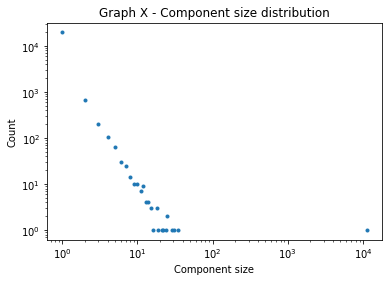

In [60]:
# compo_sizes: Dict[CompoSize, Count]
G_x_clone.to_undirected(combine_edges='first')
compo_distr_x = mesh.compo_size_distribution(G_x_clone, title_label="Graph X")

In [61]:
print("Graph X")
summarize_graph(G_x_clone, compo_distr_x)

Graph X
--------
IGRAPH UN-- 34842 34366 -- 
+ attr: name (v), pwn (v), pwn (e), rel_type (e)
|Max component|: 11159
|Max component|/|V|: 0.32


In [62]:
print("|PWN nodes|: %d" % len(G_x_clone.vs.select(pwn="pwn")))
print("|PWN edges|: %d" % len(G_x_clone.es.select(pwn="pwn")))

|PWN nodes|: 6015
|PWN edges|: 24032


In [63]:
G_x.write(cns_dir / "cwn_sense_graph_x.pkl", format="pickle")

## Graph Y

In [21]:
rel_set_y = None
G_y = mesh.build_igraph(cwn, included_rel=rel_set_y, use_pwn=True, directed=True)

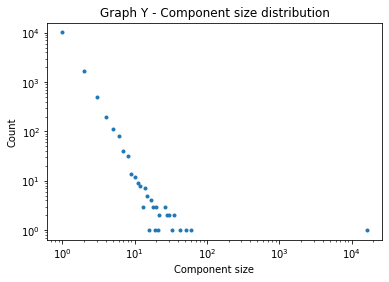

In [22]:
G_y_clone = G_y.copy()
# compo_sizes: Dict[CompoSize, Count]
G_y_clone.to_undirected(combine_edges='first')
compo_distr_y = mesh.compo_size_distribution(G_y_clone, title_label="Graph Y")

In [23]:
print("Graph X")
summarize_graph(G_y_clone, compo_distr_y)

Graph X
--------
IGRAPH UN-- 34842 58807 -- 
+ attr: name (v), pwn (v), pwn (e), rel_type (e)
|Max component|: 16154
|Max component|/|V|: 0.46


In [24]:
print("|PWN nodes|: %d" % len(G_y_clone.vs.select(pwn="pwn")))
print("|PWN edges|: %d" % len(G_y_clone.es.select(pwn="pwn")))

|PWN nodes|: 6015
|PWN edges|: 24032


In [25]:
G_y.write(cns_dir / "cwn_sense_graph_y.pkl", format="pickle")